# Predictive Modelling - Neural Networks

In this workshop you will be building your first Neural Network! Because this workshops is intened to be a walkthrough, please make sure to follow and answer each of the questions in order.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import initializers

### Exercise 1: Data Generation

- Create **2** arrays of **2000** equally spaced points between **-10** and **10**. Assign one to the variable **X** and the other to variable **y**
- Create **2** arrays of **2000** random points *(uniformly distributed)* between **-1.8** and **1.8** and add one to **X** and one to **y** (this will add noise to your data points)
- Plot your points

In [54]:
# Ex.1 
x = np.linspace(-10, 10, 2000)
y = np.linspace(-10, 10, 2000)
noise = np.random.uniform(-1.8, 1.8, 2000)

x = x + noise
y = y + noise
x.shape, y.shape, 

((2000,), (2000,))

<AxesSubplot:xlabel='x', ylabel='y'>

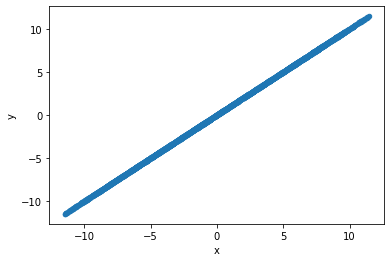

In [61]:
df =pd.DataFrame(dict(x=x, y=y))
df.plot(kind='scatter', x='x', y='y')

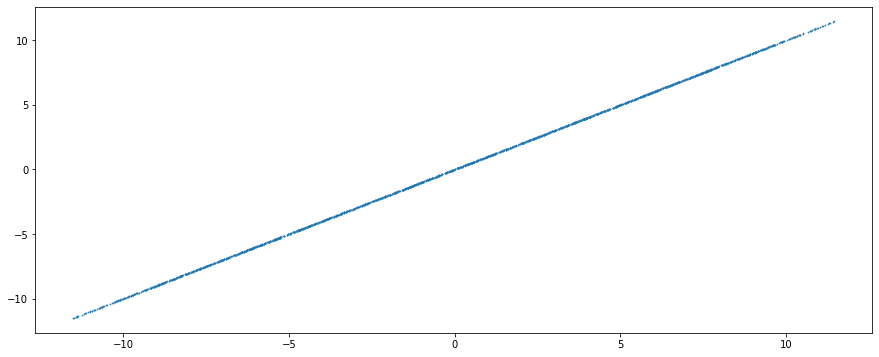

In [57]:
plt.figure(figsize=(15, 6))
plt.scatter(x, y, s=0.5)


In [36]:
x = np.expand_dims(x, axis=1)
x.shape

(2000, 1)

### Exercise 2: Your Model

Compile a simple neural network comprising of **1** *hidden layer* with **3** neurons. Don't forget your activation function!

**Note:** This is a regression problem:
- The output layer does not require an activation function
- You will need a **regression** [loss function](https://keras.io/api/losses/) & [metrics](https://keras.io/api/metrics/)

In [37]:
# Batchsize = 128
epochs = 15
# num_classes = 1


In [38]:
model = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=(1)),
        # Hidden layers
        Dense(3, activation="relu"),
        Dense(1)])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 3)                 6         
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss = "mean_squared_error", metrics=['RootMeanSquaredError'])

### Exercise 3: Train, Validation & Holdout sets

- Isolate a small portion of your data to test your model's performance after training *(Train-Test-Split)*
- Fit your model. Choose the appropriate values for your **epochs** and **batch sizes**. Set your **validation_split** to *20%*

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=101)
# convert class vectors to one-hot class matrices
# ytrain = keras.utils.to_categorical(ytrain)
# ytest = keras.utils.to_categorical(ytest)


In [41]:
xtrain.shape, ytrain.shape

((1600, 1), (1600,))

In [42]:
model.fit(xtrain, ytrain, epochs = 15, validation_split=.2)

Epoch 1/15
40/40 [==============================] - 1s 4ms/step - loss: 25.9079 - root_mean_squared_error: 5.0900 - val_loss: 26.0205 - val_root_mean_squared_error: 5.1010
Epoch 2/15
40/40 [==============================] - 0s 2ms/step - loss: 23.8907 - root_mean_squared_error: 4.8878 - val_loss: 24.2326 - val_root_mean_squared_error: 4.9227
Epoch 3/15
40/40 [==============================] - 0s 2ms/step - loss: 22.3421 - root_mean_squared_error: 4.7267 - val_loss: 22.7145 - val_root_mean_squared_error: 4.7660
Epoch 4/15
40/40 [==============================] - 0s 2ms/step - loss: 20.9925 - root_mean_squared_error: 4.5818 - val_loss: 21.3881 - val_root_mean_squared_error: 4.6247
Epoch 5/15
40/40 [==============================] - 0s 2ms/step - loss: 19.7644 - root_mean_squared_error: 4.4457 - val_loss: 20.1730 - val_root_mean_squared_error: 4.4914
Epoch 6/15
40/40 [==============================] - 0s 2ms/step - loss: 18.6858 - root_mean_squared_error: 4.3227 - val_loss: 19.1266 - val_

### Exercise 4: Model Evaluation 

- Evaluate your model
- Plot your **y_true** and your **predictions**

In [43]:
# Ex. 4
score = model.evaluate(xtest, ytest, verbose=0)
print("RMSE:", score[0])
print("MSE:", score[1])

RMSE: 13.803546905517578
MSE: 3.7153124809265137


In [44]:
ypred = model.predict(xtest)

13/13 [==============================] - 0s 917us/step


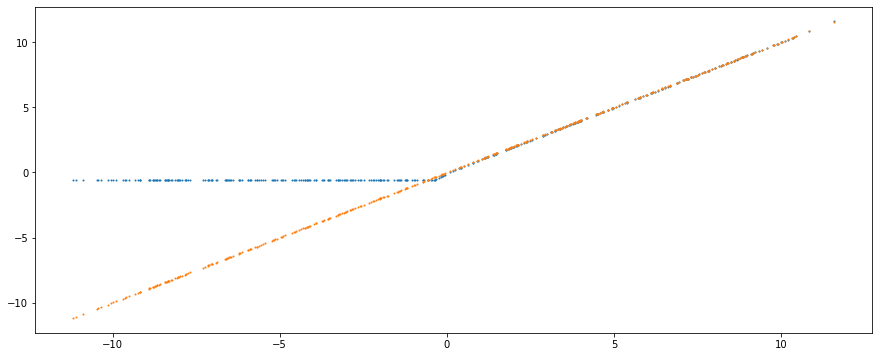

In [45]:
plt.figure(figsize=(15, 6))
plt.scatter(xtest, ypred, s=1)
plt.scatter(xtest, ytest, s=1)

### Exercise 5.1: Fine Tuning

The number of neurons within the *hidden layer*, as well as the *number* of hidden layers used, significantly impact a model's results.
- Change the number of neurons in the *hidden layer* to **10**
- Train and evaluate your model. Compare your results 

In [46]:
# Ex. 5.1
model = keras.Sequential([
                        keras.Input(shape=(1)),
                        Dense(10, activation='relu'),
                        Dense(1)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss = "mean_squared_error",optimizer='adam', metrics=['RootMeanSquaredError'])
model.fit(xtrain, ytrain, epochs = epochs, validation_split=0.2 )
score = model.evaluate(xtest, ytest, verbose=0)
print('================================')
print('================================')
print('MSE:', score[0] )
print('RMSE:', score[1])

Epoch 1/15
40/40 [==============================] - 0s 5ms/step - loss: 26.8868 - root_mean_squared_error: 5.1853 - val_loss: 21.2250 - val_root_mean_squared_error: 4.6071
Epoch 2/15
40/40 [==============================] - 0s 2ms/step - loss: 19.5807 - root_mean_squared_error: 4.4250 - val_loss: 15.4159 - val_root_mean_squared_error: 3.9263
Epoch 3/15
40/40 [==============================] - 0s 2ms/step - loss: 14.2470 - root_mean_squared_error: 3.7745 - val_loss: 11.2221 - val_root_mean_squared_error: 3.3499
Epoch 4/15
40/40 [==============================] - 0s 2ms/step - loss: 10.4002 - root_mean_squared_error: 3.2249 - val_loss: 8.0664 - val_root_mean_squared_error: 2.8401
Epoch 5/15
40/40 [==============================] - 0s 2ms/step - loss: 7.4677 - root_mean_squared_error: 2.7327 - val_loss: 5.8561 - val_root_mean_squared_error: 2.4199
Epoch 6/15
40/40 [==============================] - 0s 2ms/step - loss: 5.3365 - root_mean_squared_error: 2.3101 - val_loss: 4.1235 - val_root_

### Exercise 5.2: Fine Tuning P2

Do the same as in `5.1`, except:
- Reset the number of neurons in the *hidden layer* to **3**
- Add a second *hidden layer* with **3** neurons
- Initialize the model's weights with the use of [*initializers*](https://keras.io/api/layers/initializers/)
- Train and evaluate your model. Compare your results from all previous models

In [48]:
# Ex. 5.2 
initializer = initializers.RandomNormal(mean=0, stddev=0.95, seed=None)
model = keras.Sequential([
                        keras.Input(shape=(1)),
                        Dense(3, kernel_initializer=initializer, activation='relu'),
                        Dense(3, kernel_initializer=initializer, activation='relu'),
                        Dense(1, kernel_initializer=initializer, activation='relu')
])

model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
model.fit(xtrain, ytrain, epochs=epochs, validation_split=.2)

print('=====================')
print('=====================')
score = model.evaluate(xtest, ytest, verbose=3)
print('MSE:', score[0])
print('RMSE:', score[1])

Epoch 1/15
40/40 [==============================] - 0s 4ms/step - loss: 474.2785 - root_mean_squared_error: 21.7779 - val_loss: 440.5711 - val_root_mean_squared_error: 20.9898
Epoch 2/15
40/40 [==============================] - 0s 2ms/step - loss: 379.5439 - root_mean_squared_error: 19.4819 - val_loss: 355.8426 - val_root_mean_squared_error: 18.8638
Epoch 3/15
40/40 [==============================] - 0s 2ms/step - loss: 308.3225 - root_mean_squared_error: 17.5591 - val_loss: 291.1210 - val_root_mean_squared_error: 17.0623
Epoch 4/15
40/40 [==============================] - 0s 2ms/step - loss: 253.5481 - root_mean_squared_error: 15.9232 - val_loss: 242.0960 - val_root_mean_squared_error: 15.5594
Epoch 5/15
40/40 [==============================] - 0s 2ms/step - loss: 211.7352 - root_mean_squared_error: 14.5511 - val_loss: 202.2145 - val_root_mean_squared_error: 14.2202
Epoch 6/15
40/40 [==============================] - 0s 2ms/step - loss: 178.2725 - root_mean_squared_error: 13.3519 - va

13/13 [==============================] - 0s 1000us/step


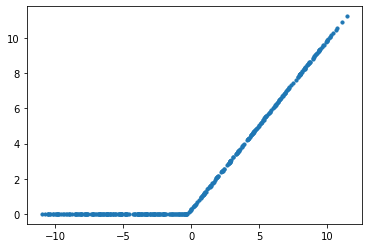

In [18]:
ypred = model.predict(xtest)
plt.scatter(ytest, ypred, s=10)

### Exercise 6: Automate!

Use a function to *automate* questions 1 through 5. The function should have 3 parameters: 
- Activation function 
- Number of hidden layers
- Number of neurons for each of the hidden layers

Try passing different arguments to function to try to get the best result that you can (at least 3 different results)

In [19]:
def Seqential(Activation_function, Number_hidden_layers, Number_neurons):

    x = np.linspace(-10, 10, 2000)
    y = np.linspace(-10, 10, 2000)
    noise = np.random.uniform(-1.8, 1.8, 2000)

    x = x + noise
    y = y + noise
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=101)
    model = keras.Sequential()
    
    model.add(Dense(3, input_dim= 1))#we should define try and except to raise error
    model.add(Activation(Activation_function))
    
    initializer = initializers.RandomNormal(mean=0, stddev=0.5, seed=None)   
    for i in range(Number_hidden_layers):
        model.add(Dense(3, kernel_initializer=initializer))
        model.add(Activation(Activation_function))
            
    model.add(Dense(1))
    model.add(Activation(Activation_function))
    
    
    model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
    model.summary()
    model.fit(xtrain, ytrain, epochs=15, validation_split=.2)
    score = model.evaluate(xtest, ytest, verbose=3)
    print('=====================')
    print('=====================')
    print('MSE:', score[0])
    print('RMSE:', score[1])
    
    ypred = model.predict(xtest)
    plt.figure(figsize=(10, 6))
    plt.scatter(xtest, ypred, s=1)
    plt.scatter(xtest, ypred, s=10, label=Activation_function)
    plt.legend()
    
    return 

    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 6         
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
40/40 [==============================] - 0s 4ms/step - loss: 34.5779 - root_mean_squared_error: 5.8803 - val_loss: 32.4879 - val_root_mean_squared_error: 5.6998
Epoch 2/15
40/40 [

 activation_6 (Activation)   (None, 3)                 0         
                                                                 
 dense_14 (Dense)            (None, 3)                 12        
                                                                 
 activation_7 (Activation)   (None, 3)                 0         
                                                                 
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
 activation_8 (Activation)   (None, 3)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
 activation_9 (Activation)   (None, 1)                 0         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
______________

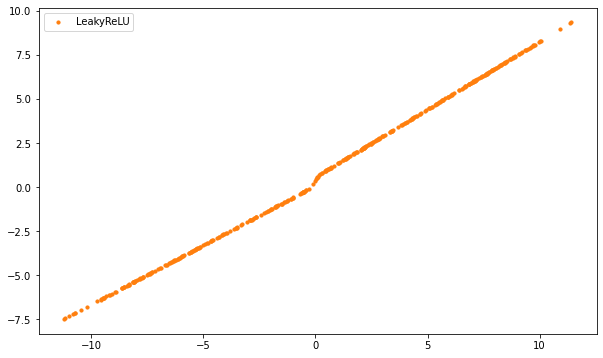

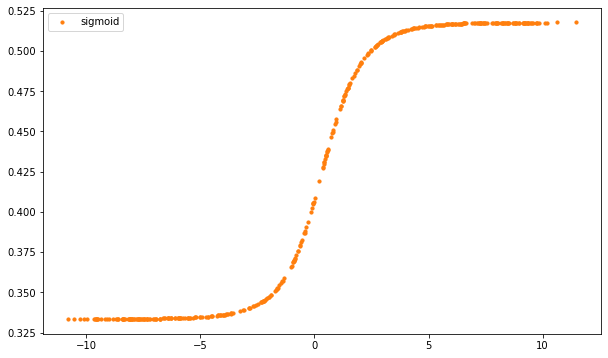

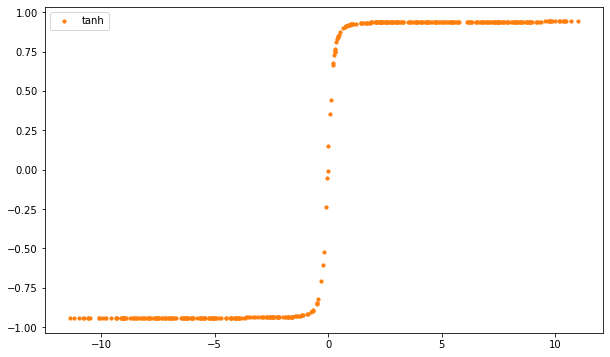

In [20]:
Seqential(Activation_function='LeakyReLU', Number_hidden_layers=0, Number_neurons=3)
Seqential(Activation_function='sigmoid', Number_hidden_layers=2, Number_neurons=5)
Seqential(Activation_function='tanh', Number_hidden_layers=2, Number_neurons=3)